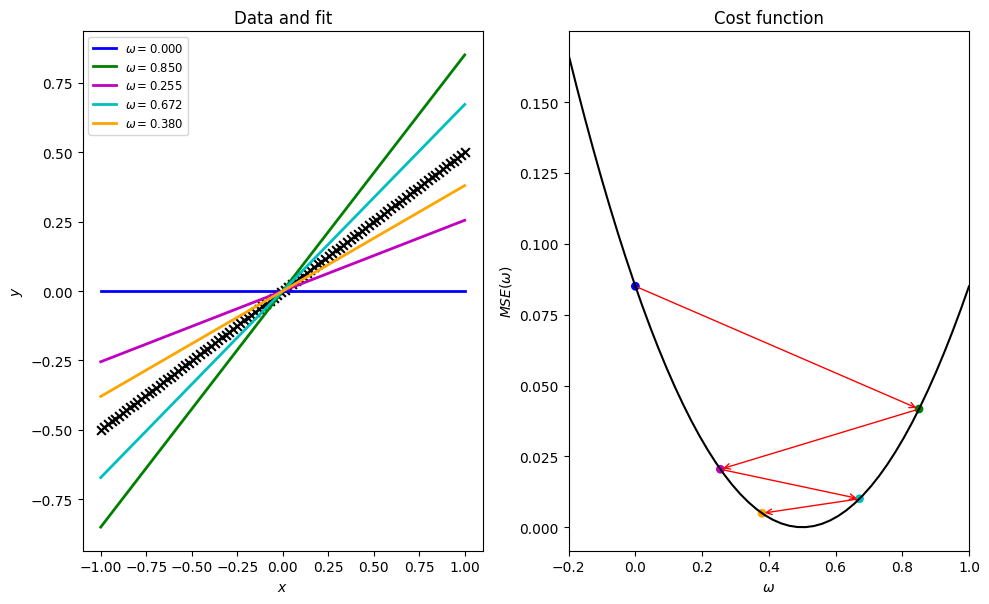

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 100
weight_true = 0.5
x = np.linspace(-1,1,m)
y = weight_true * x # y = 0.5x

def obj_fun(weight):
    return weight*x

def mse(weight):
    if np.isscalar(weight):
        return np.mean((y-obj_fun(weight))**2)
    else:
        # temp_w = weight[:, np.newaxis] 製作一個50x1的矩陣 (newaxis好神奇)
        return np.average((y-obj_fun(weight[:, np.newaxis]))**2, axis=1)
        
'''y = 0.5x的圖'''
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')
'''y = 0.5x的圖'''

'''準備gradient descent的底圖'''
weight_grid = np.linspace(-0.2,1,50) #注意這邊有50個點
possible_error = mse(weight=weight_grid)
ax[1].plot(weight_grid, possible_error, 'k')
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\omega$')
ax[1].set_ylabel(r'$MSE(\omega)$')
ax[1].set_title('Cost function')
'''準備gradient descent的底圖'''

'''用gradient descent跑每一個weight'''
N = 5 #分別用五種顏色表示
lr = 5 # learning rate
weights = [0]
all_mse = [mse(weights[0])]

for _ in range(1, N):
    last_weight = weights[-1]
    this_weight = last_weight - lr * np.mean((obj_fun(last_weight) - y) * x)
    weights.append(this_weight)
    all_mse.append(mse(this_weight))
  
'''把每一個wight算出的線畫出來，用5種顏色'''
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, obj_fun(weights[0]), color=colors[0], lw=2, label=r'$\omega = {:.3f}$'.format(weights[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(weights[j], all_mse[j]), xytext=(weights[j-1], all_mse[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, obj_fun(weights[j]), color=colors[j], lw=2,label=r'$\omega = {:.3f}$'.format(weights[j]))

ax[1].scatter(weights, all_mse, c=colors, s=40, lw=0)

'''圖的設定'''
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()